<img src="../images/house.jpeg" style="float: center; margin: 20px; height: 55px">

## Ames Housing Data and Kaggle Challenge

_Author: Afolabi Cardoso_

---

## Linear Regression Model (numerical variables)

---
#### Contents
[Overview](#Overview) | [Imports](#Imports) | [Feature Selection](#Feature-Selection) | [Model Creation](#Model-Creation) | [Model Fit](#Model-Fit) | [Model Evaluation](#Model-Evaluation) | [Conclusion](#Conclusion) | [Kaggle Submission](#Kaggle-Submission)

---
## Overview

In this  first experiment, we are going to utilize only the numerical features to create the model. 

The model used is the scikit learn linear regression model

---
## Imports

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [41]:
df = pd.read_csv('../datasets/train_clean.csv',index_col=[0])

In [42]:
df_test = pd.read_csv('../datasets/test_clean.csv',index_col=[0])

---
## Feature Selection

#### Get numeric features

Filter out the numeric features and assign them to a variable 

In [43]:
numerical = df.dtypes[df.dtypes!=object].index
numerical_corr = df[numerical].corr().iloc[:,-1].sort_values(ascending=False)  #correlation value with sale price

In [44]:
df=df[numerical]

#### Drop columns with low correlation first

Select the features we determined from the EDA to have low correlation with SalePrice and assign the to a variable and drop them

In [45]:
low_corr = ['Screen Porch','Bedroom AbvGr','3Ssn Porch','Mo Sold','BsmtFin SF 2',
       'Pool Area','Misc Val','Yr Sold','Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch']

In [46]:
df.drop(columns=low_corr, inplace=True)

Do the same for the Kaggle test data

In [47]:
df_test.drop(columns=low_corr, inplace=True)

---
## Model Creation

First let's establish the baseline

Create model parameters

In [48]:
features = list(df.columns) 

In [49]:
X = df[features].drop(columns=['SalePrice'])
y = df['SalePrice']

#### Train/test/split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Instantiate our model

In [51]:
model = LinearRegression()

---
## Model Fit

#### Fit the model

In [52]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

---
## Baseline

In [53]:
y_baseline = y.mean()

---
## Model Evaluation

#### Train data evaluation

In [54]:
model.score(X_train, y_train)

0.8001812908506292

#### Test data evaluation

In [55]:
model.score(X_test, y_test)

0.8520669403666148

#### Root Mean Squared Error

Find the residuals 

In [56]:
y_predicted =  model.predict(X_test)
residuals = y_test - y_predicted

Use residuals to calculate the Mean Squared Error

In [57]:
mse = metrics.mean_squared_error(y_test,y_predicted)
rmse = mse**0.5

#### Cross evaluation

In [58]:
cross_val_score(model, X_train, y_train).mean()

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7396930905129081

#### Histogram plot of the residuals

What we are looking for in the histogram is a <b> normal distribution </b>. This will show equal spread of variance the residuals.

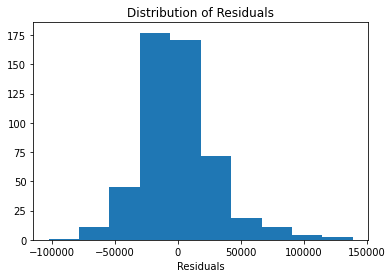

In [59]:
plt.hist(residuals)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals');

#### Scatter plot of residuals 

What we are looking for in the scatterplot is randomness across the residuals. The scatterplot below has some sort of parabolic shape. It curves downward indicating a possible overfit model i.e <b>Heteroscedasticity</b>

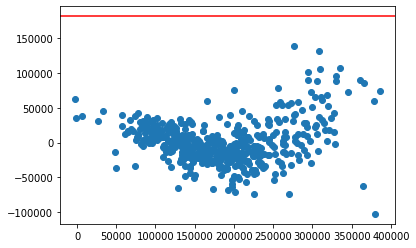

In [67]:
plt.axhline(y.mean(), color = 'r')
plt.scatter(model.predict(X_test), residuals);

---
## Conclusion

We have a Train score of 80% and a test score of 85%.

The low $R^2$ score for cross evaluation is<b> 73.9% </b>which indicates a model with <b> high bias</b>. This is expected  because only the numeric features were utilized in training the model. 

In the next notebook, I make use of both numeric data and categorical data in creating a linear regression model

---
## Kaggle Submission

In [61]:
df_test=df_test[X.columns]

In [62]:
y_predict = model.predict(df_test) 

#### Create a dataframe of the ID and predicted sale price

In [63]:
df_test['SalePrice'] = y_predict
model_submission = df_test[['Id','SalePrice' ]]
model_submission

,Id,SalePrice
0,2658,146857.975736
1,2718,178978.977027
2,2414,223648.022806
3,1989,116444.456231
4,625,191137.875916
...,...,...
873,1662,199148.184271
874,1234,220703.260308
875,1373,125490.816255
876,1672,97395.622371


---
## Export

#### Export model_submission dataframe

In [64]:
model_submission.set_index('Id', inplace=True)

In [65]:
model_submission.to_csv('../datasets/numerical_features_model.csv')

---
[Overview](#Overview) | [Imports](#Imports) | [Feature Selection](#Feature-Selection) | [Model Creation](#Model-Creation) | [Model Fit](#Model-Fit) | [Model Evaluation](#Model-Evaluation) | [Conclusion](#Conclusion) | [Kaggle Submission](#Kaggle-Submission)